# **CLASSIFICATION METRICS**

Evaluation metrics for classification models are often called classification metrics. Evaluating the performance of our classification model is crucial to ensure its validity and effectiveness.

Along with accuracy metrics, there are a few more evaluation metrics that are as important as accuracy depending on the classification task and data we are dealing with. The most popular and often mentioned metrics are:

* **CONFUSION MATRIX**
* **ACCURACY**
* **PRECISION**
* **RECALL**
* **F1-SCORE**
* **CLASSIFICATION REPORT**

We will cover these metrics one by one with detailed explanations and then see these in action with a simple classification model evaluation with torchmetrics the `torchmetrics` library.

Let us create a sample ground truth values and dummy prediction values for better visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, matthews_corrcoef

import seaborn as sns

# Sample true labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])
y_pred = np.array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

print(f"Length of Ground Truth Values :\t {len(y_true)}")
print(f"Length of Predicted Values :\t {len(y_pred)}")

Length of Ground Truth Values :	 30
Length of Predicted Values :	 30


### Confusion Matrix

A table that visualizes the performance of a classification model. It shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

* **True Positive (TP):** Predicted positive and actually positive.
* **True Negative (TN):** Predicted negative and actually negative.
* **False Positive (FP):** Predicted positive but actually negative (Type I error).
* **False Negative (FN):** Predicted negative but actually positive (Type II error).

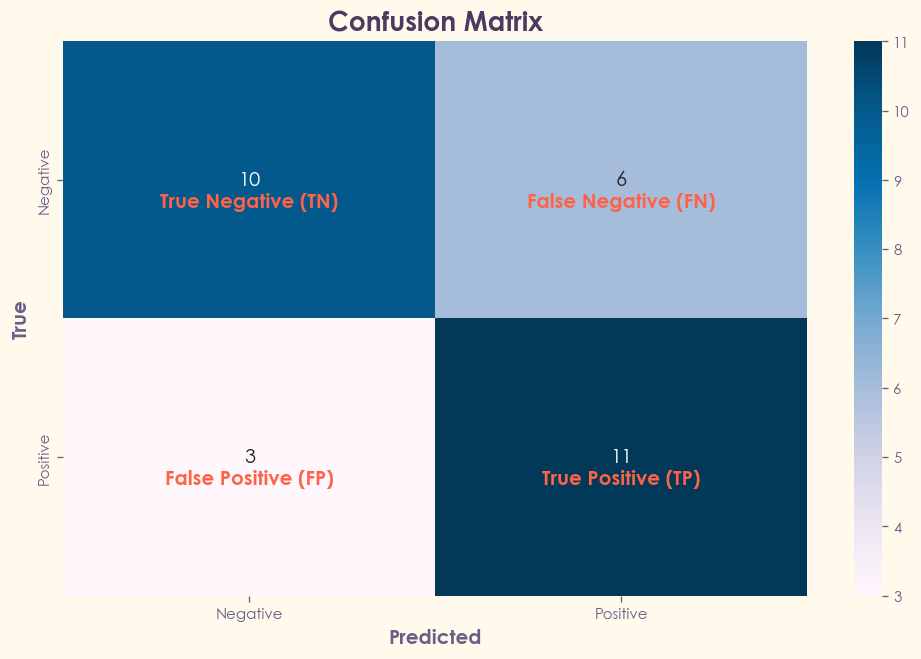

In [2]:
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add TP, TN, FP, FN labels
plt.text(0.5, 0.58, 'True Negative (TN)', ha='center', va='center', color='tomato', fontweight='bold')
plt.text(0.5, 1.58, 'False Positive (FP)', ha='center', va='center', color='tomato',fontweight='bold')
plt.text(1.5, 0.58, 'False Negative (FN)', ha='center', va='center', color='tomato',fontweight='bold')
plt.text(1.5, 1.58, 'True Positive (TP)', ha='center', va='center', color='tomato', fontweight='bold')

plt.grid(False)
plt.show()

### Accuracy

The ratio of correctly predicted instances to the total instances. It is a general measure of **how often the model is correct**. It is calculated as the number of correct predictions divided by the total number of predictions.

$$ \textit{Accuracy} = \frac{(TP + TN)}{(TP + TN + FP + FN)}$$

In [3]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy*100} %")

Accuracy: 70.0 %


### Precision

The ratio of correctly predicted positive instances to the total predicted positive instances, stating **how many of the predicted positives are actually positive**. This evaluates the accuracy of positive predictions, calculated by dividing the number of true positives by the total number of positive predictions (both true and false positives). 
$$ \textit{Precision} = \frac{TP}{(TP + FP)}$$

In [4]:
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.6471


### Recall (Sensitivity)
The ratio of correctly predicted positive instances to the total actual positive instances, stating **how many of the actual positives are correctly identified.** This measures the model's ability to identify all relevant instances, calculated by dividing the number of true positives by the total number of actual positive instances. The term "sensitivity" is often used in medical contexts, while "recall" is more common in general machine learning applications.

$$ \textit{Recall (Sensitivity)} = \frac{TP}{(TP + FN)}$$

In [5]:
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.7857


### F1-Score

The harmonic mean of precision and recall, states a balanced measure that considers both precision and recall. This metric balances precision and recall, providing a single score that reflects both aspects of a model's performance. 

$$ \textit{F1-Score} = \frac{2 \cdot (Precision \cdot Recall)}{(Precision + Recall)}$$

In [6]:
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.7097


### Classification Report

A comprehensive report that provides precision, recall, F1-score, and support (number of samples) for each class. It is aconvenient way to see all key metrics at once.

In [7]:
report = classification_report(y_true, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.62      0.69        16
    Positive       0.65      0.79      0.71        14

    accuracy                           0.70        30
   macro avg       0.71      0.71      0.70        30
weighted avg       0.71      0.70      0.70        30



In [8]:
# Sample predicted probabilities (for ROC/AUC)
y_probs = np.array([0.9, 0.1, 0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.9, 0.1,
                    0.1, 0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.9, 0.1, 0.1,
                    0.8, 0.4, 0.2, 0.6, 0.7, 0.3, 0.9, 0.1, 0.3, 0.9])
len(y_probs)

30

### ROC Curve (Receiver Operating Characteristic Curve)

A graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various threshold settings, where **TPR (Recall) is plotted against FPR.** 

$$ \textit{True-Positive Rate (TPR=Recall)} = \frac{TP}{(TP + FN)}$$

$$ \textit{False-Positive Rate (FPR)} = \frac{FP}{(FP + TN)}$$

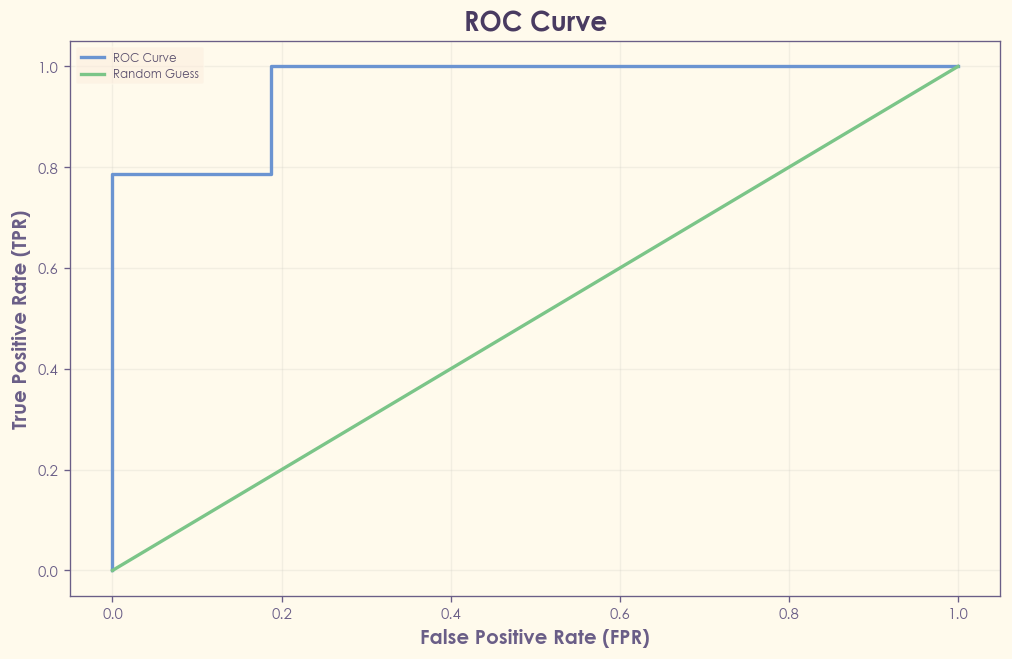

In [9]:
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

### AUC (Area Under the ROC Curve)

AUC summarizes the performance of a model across all possible thresholds, providing a single numerical value representing the model's discriminative ability. It is simply **the area under the ROC curve**. A single value summarizing the overall performance of the model. AUC of 1 indicates perfect classification, while 0.5 indicates random guessing.

In [10]:
auc = roc_auc_score(y_true, y_probs)
print(f"AUC: {auc:.4f}")

AUC: 0.9598


### Root Mean Squared Error (RMSE)

The square root of the average of the squared differences between the predicted and true values. Primarily used for regression, but can also be used in classification when dealing with probabilities. **Measures the average magnitude of errors.**

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$
$y_i$ = Actual values </BR>
$\hat{y}_i$ = Predicted values</BR>
$n$ = Total number of observations

In [11]:
rmse = np.sqrt(mean_squared_error(y_true, y_probs))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.3235


### Matthews Correlation Coefficient (MCC)

MCC considers all four quadrants of the confusion matrix (true positives, true negatives, false positives, and false negatives) and is useful for imbalanced datasets. Generally regarded as a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four categories (true positives, true negatives, false positives, and false negatives) proportionally both to the size of positive elements and the size of negative elements in the dataset. 

$$\text{MCC} = \frac{(TP \cdot TN - FP \cdot FN)}{\sqrt{(TP + FP) \cdot (TP + FN) \cdot (TN + FP) \cdot (TN + FN)}}$$

#### MCC Visualization
Many classification models (like logistic regression or neural networks with a sigmoid output) don't directly output a 0 or 1. Instead, they produce a probability, a value between 0 and 1, indicating the likelihood of an instance belonging to the positive class. To make a final binary decision (0 or 1), we need to set a threshold. If the predicted probability is above the threshold, we classify the instance as 1; otherwise, as 0.

The MCC vs. Threshold plot helps you understand how the choice of threshold affects your model's performance, allowing you to select a threshold that maximizes the MCC, particularly important for imbalanced datasets. 
* The plot shows how the MCC changes as the threshold varies. 
* The peak of the curve indicates the threshold that yields the highest MCC.
* If the graph shows a very low MCC for all thresholds, then the model is performing poorly.

In essence, the MCC vs. Threshold plot helps you understand how the choice of threshold affects your model's performance, allowing you to select a threshold that maximizes the MCC, particularly important for imbalanced datasets.

In [12]:
mcc = matthews_corrcoef(y_true, y_pred)
print(f"MCC: {mcc:.4f}")

MCC: 0.4135


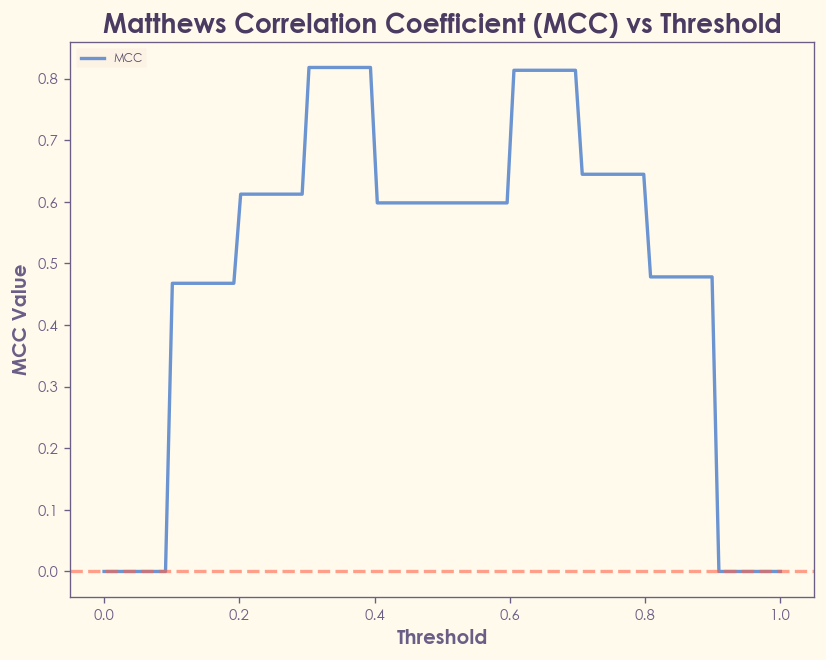

In [13]:
# Compute MCC at various thresholds
thresholds = np.linspace(0, 1, 100)  # Thresholds between 0 and 1
mcc_values = []

for threshold in thresholds:
    # Generate binary predictions based on threshold
    y_pred_threshold = (y_probs >= threshold).astype(int)
    
    # Calculate MCC for the current threshold
    mcc = matthews_corrcoef(y_true, y_pred_threshold)
    mcc_values.append(mcc)

# Plot MCC vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, mcc_values, label='MCC', linewidth=2)
plt.axhline(0, color="tomato", linestyle="--", linewidth=2, alpha=0.6)  # Reference line for MCC=0
plt.title("Matthews Correlation Coefficient (MCC) vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("MCC Value")
plt.legend()
plt.grid()
plt.show()

## Classification Metrics in Action

In [14]:
# Import necessary modules and libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torchmetrics

In [15]:
# Create synthetic dataset
NUM_CLASSES = 4
X, y = make_classification(n_samples=2000, n_features=20, n_classes=NUM_CLASSES, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

device = 'cuda' if torch.cuda.is_available() is True else 'cpu'
print(f"Active Device: {device}")

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Active Device: cuda


In [16]:
# Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [17]:
# Initialize the model, loss function, and optimizer
input_size = 20
hidden_size = 64
num_classes = 2
model = SimpleNN(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
# Train the model and store loss values
num_epochs = 1000
loss_values = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    loss_values.append(average_loss)
    
    if epoch % 100 == 0:
        print(f"Epoch [{epoch:03d}/{num_epochs}],  Loss: {average_loss:.4f}")

Epoch [000/1000],  Loss: 3.8208
Epoch [100/1000],  Loss: 0.4369
Epoch [200/1000],  Loss: 0.3786
Epoch [300/1000],  Loss: 0.3271
Epoch [400/1000],  Loss: 0.2732
Epoch [500/1000],  Loss: 0.2293
Epoch [600/1000],  Loss: 0.1920
Epoch [700/1000],  Loss: 0.1627
Epoch [800/1000],  Loss: 0.1368
Epoch [900/1000],  Loss: 0.1154


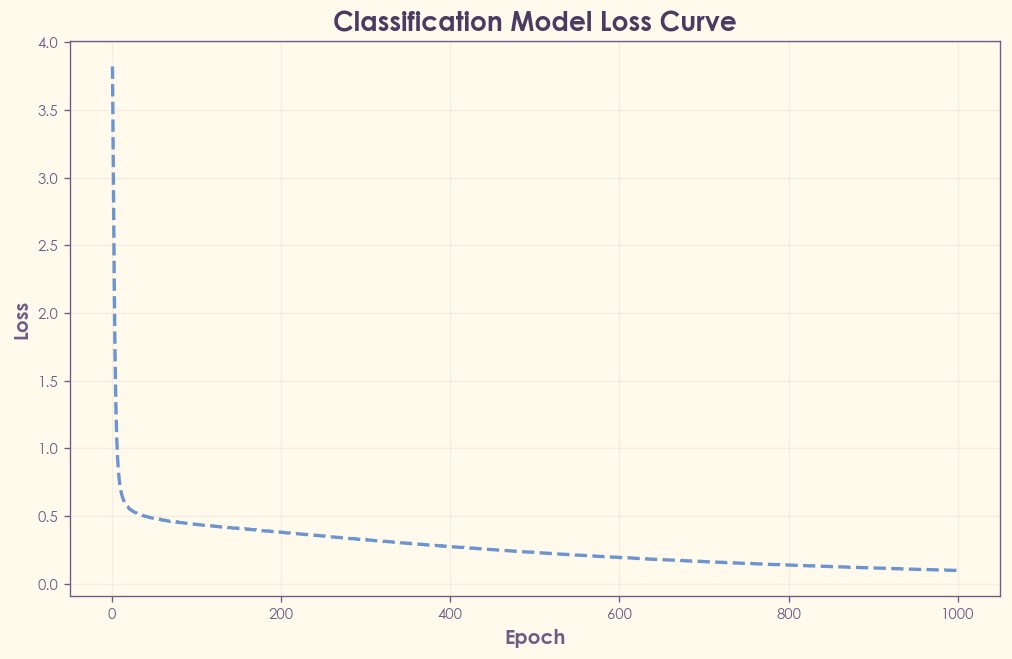

In [19]:
# Plot the loss curve
plt.plot(range(1, num_epochs + 1), loss_values, '--', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Classification Model Loss Curve')
plt.show()

In [20]:
from sklearn.metrics import classification_report

# Evaluation
model.eval()
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_list.append(predicted)
        y_true_list.append(labels)

y_pred = torch.cat(y_pred_list).cpu()
y_true = torch.cat(y_true_list).cpu()

# Metrics
accuracy = torchmetrics.functional.accuracy(y_pred, y_true, task="multiclass", num_classes=NUM_CLASSES)
precision = torchmetrics.functional.precision(y_pred, y_true, average='macro', num_classes=NUM_CLASSES, task="multiclass")
recall = torchmetrics.functional.recall(y_pred, y_true, average='macro', num_classes=NUM_CLASSES, task="multiclass")
f1_score = torchmetrics.functional.f1_score(y_pred, y_true, average='macro', num_classes=NUM_CLASSES, task="multiclass")
confusion_matrix = torchmetrics.functional.confusion_matrix(y_pred, y_true, num_classes=NUM_CLASSES, task="multiclass")

# Classification report using sklearn
report = classification_report(y_true.numpy(), y_pred.numpy(), target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

print(f"Accuracy: \t{accuracy:.4f}")
print(f"Precision: \t{precision:.4f}")
print(f"Recall: \t{recall:.4f}")
print(f"F1-Score: \t{f1_score:.4f}")
print(f"\nConfusion Matrix:\n {confusion_matrix}")
print(f"\nClassification Report:\n {report}")

Accuracy: 	0.7933
Precision: 	0.7899
Recall: 	0.7978
F1-Score: 	0.7906

Confusion Matrix:
 tensor([[113,  10,  25,   6],
        [  7, 145,   4,   2],
        [ 27,   3,  96,  30],
        [  1,   2,   7, 122]])

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.76      0.73      0.75       154
     Class 1       0.91      0.92      0.91       158
     Class 2       0.73      0.62      0.67       156
     Class 3       0.76      0.92      0.84       132

    accuracy                           0.79       600
   macro avg       0.79      0.80      0.79       600
weighted avg       0.79      0.79      0.79       600



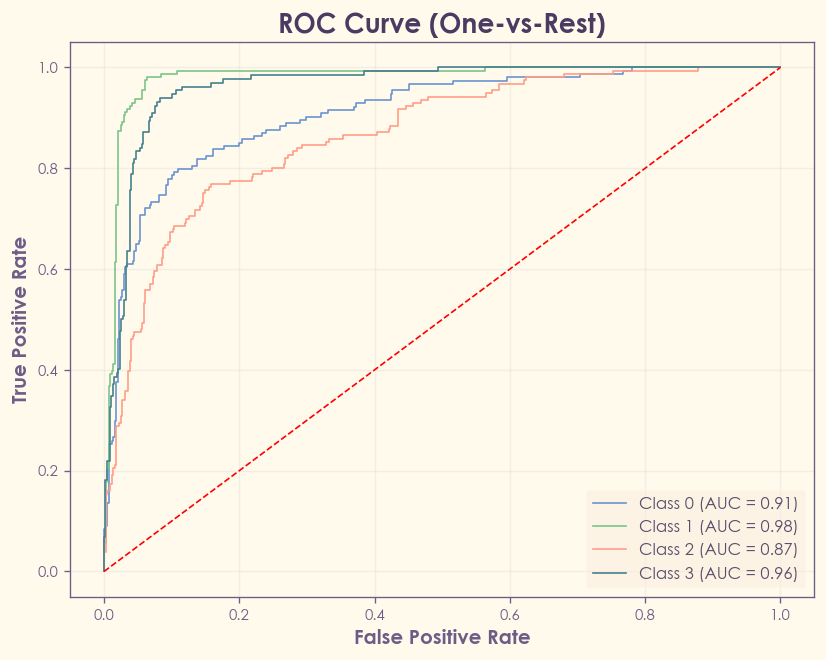

In [32]:
from sklearn.metrics import auc

# ROC and AUC (One-vs-Rest)
model.eval()
y_probs_list = []
y_true_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)  # Get probabilities
        y_probs_list.append(probs)
        y_true_list.append(labels)

y_probs = torch.cat(y_probs_list).cpu().numpy()
y_true = torch.cat(y_true_list).cpu().numpy()

plt.figure(figsize=(8, 6))
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(prop={"size": 10}, loc="lower right")
plt.show()

In [31]:
# Calculate and print final MCC
y_pred_probs = torch.softmax(model(X_test), dim=1).detach().cpu().numpy()
y_pred_final = np.argmax(y_pred_probs, axis=1)

final_mcc = matthews_corrcoef(y_test.cpu().numpy(), y_pred_final)
print(f"Final MCC: {final_mcc:.4f}")

Final MCC: 0.7265
